# Разработка модели машинного обучения для принятия решения о покупке коров молочным хозяйством «Вольный луг»

Владелец молочного хозяйства «Вольный луг» хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма». «ЭкоФерма» готова предоставить подробные данные о своих коровах. Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным — строго по его критериям.\
Для выполнения проекта необходимо разработать модель машинного обучения, которая поможет владельцу управлять рисками и принимать объективное решение о покупке, а также создать две прогнозные модели для отбора бурёнок в поголовье:\
Первая будет прогнозировать возможный удой коровы (целевой признак Удой);\
Вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак Вкус молока).\
С помощью модели нужно отобрать коров по двум критериям:
- средний удой за год — не менее 6000 килограммов;
- молоко должно быть вкусным.

Для работы было предоставлено три датасета:
- ferma_main.csv
- ferma_dad.csv
- cow_buy.csv

Файл ferma_main.csv содержит данные о стаде фермера на текущий момент. Описание данных:
- id — уникальный идентификатор коровы;
- Удой, кг — масса молока, которую корова даёт в год (в килограммах);
- ЭКЕ (Энергетическая кормовая единица) — показатель питательности корма коровы;
- Сырой протеин, г — содержание сырого протеина в корме (в граммах);
- СПО (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы;
- Порода — порода коровы;
- Тип пастбища — ландшафт лугов, на которых паслась корова;
- порода папы_быка — порода папы коровы;
- Жирность,% — содержание жиров в молоке (в процентах);
- Белок,% — содержание белков в молоке (в процентах);
- Вкус молока — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно);
- Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет);
Признаки в датасете ferma_main.csv можно разделить на группы.\
Характеристики коровы: id, Порода, порода папы_быка, Возраст.\
Характеристики корма: ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г, СПО (Сахаро-протеиновое соотношение).\
Характеристика пастбища: Тип пастбища.\
Характеристики молока: Удой, кг, Жирность,%, Белок,%, Вкус молока.

Файл ferma_dad.csv хранит имя папы каждой коровы в стаде фермера. Описание данных:
- id — уникальный идентификатор коровы;
- Имя Папы — имя папы коровы;

Файл cow_buy.csv — это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой. Описание данных:
- Порода — порода коровы.
- Тип пастбища — ландшафт лугов, на которых паслась корова.
- порода папы_быка — порода папы коровы.
- Имя_папы — имя папы коровы.
- Текущая_жирность,% — содержание жиров в молоке (в процентах).
- Текущий_уровень_белок,% — содержание белков в молоке (в процентах).
- Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).
- Данные в файлах ferma_main.csv и cow_buy.csv похожи, но у датасета cow_buy.csv несколько особенностей.
- Содержание белков и жиров в молоке указано на момент продажи — когда «ЭкоФерма» давала коровам свой корм.
- Параметры корма ЭКЕ (Энергетическая кормовая единица), Сырой протеин, г и СПО (Сахаро-протеиновое соотношение) отсутствуют.\
Технологи заказчика пересмотрели подход к кормлению: для новых коров планируется увеличить значения каждого из этих параметров на 5%.

Для выполнения данного проекта необходимо:

- загрузить и изучить данные;
- выполнить предобработку данных;
- провести исследовательский анализ данных;
- провести корреляционный анализ признаков в датасете ferma_main.csv;
- решить задачу регрессии;
- решить задачу классификации;
- написать общий вывод.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import (
    r2_score,
    mean_squared_error,
    mean_absolute_error,
    accuracy_score,
    confusion_matrix,
    recall_score,
    precision_score
)

## Загрузка данных

In [2]:
#считывание csv-файлов и сохранение в датафреймы
ferma_main = pd.read_csv('/datasets/ferma_main.csv', sep=';', decimal=',')
ferma_dad = pd.read_csv('/datasets/ferma_dad.csv', sep=';')
cow_buy = pd.read_csv('/datasets/cow_buy.csv', sep=';', decimal=',')

In [3]:
# получение первых 20 строк датафрейма ferma_main
ferma_main.head(20)

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет
5,6,5254,12.7,1806,0.885,РефлешнСоверинг,Холмистое,Соверин,3.13,3.078,вкусно,менее_2_лет
6,7,5910,13.2,1792,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.48,3.077,вкусно,более_2_лет
7,8,6179,14.7,1806,0.930,Вис Бик Айдиал,Равнинные,Айдиал,3.55,3.076,вкусно,более_2_лет
8,9,6783,14.2,1918,0.940,РефлешнСоверинг,Холмистое,Айдиал,3.71,3.077,вкусно,более_2_лет
9,10,5339,13.4,1791,0.895,Вис Бик Айдиал,Холмистое,Соверин,3.13,3.075,вкусно,менее_2_лет


In [4]:
# вывод основной информации о датафрейме ferma_main
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   Удой, кг                               634 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    float64
 3   Сырой протеин, г                       634 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    float64
 5   Порода                                 634 non-null    object 
 6   Тип пастбища                           634 non-null    object 
 7   порода папы_быка                       634 non-null    object 
 8   Жирность,%                             634 non-null    float64
 9   Белок,%                                634 non-null    float64
 10  Вкус молока                            634 non-null    object 
 11  Возрас

In [5]:
# получение первых 20 строк датафрейма ferma_dad
ferma_dad.head(20)

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин
5,6,Барин
6,7,Соловчик
7,8,Геркулес
8,9,Буйный
9,10,Барин


In [6]:
# вывод основной информации о датафрейме ferma_dad
ferma_dad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


In [7]:
# получение первых 20 строк датафрейма cow_buy
cow_buy.head(20)

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет


In [8]:
# вывод основной информации о датафрейме cow_buy
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Порода                   20 non-null     object 
 1   Тип пастбища             20 non-null     object 
 2   порода папы_быка         20 non-null     object 
 3   Имя_папы                 20 non-null     object 
 4   Текущая_жирность,%       20 non-null     float64
 5   Текущий_уровень_белок,%  20 non-null     float64
 6   Возраст                  20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


**Вывод**\
На этапе загрузки данных были изучены датафреймы ferma_main, ferma_dad, cow_buy, а также основная информация о данных датафреймах. 

##  Предобработка данных

In [9]:
# приведение всех столбцов датафреймов ferma_main, ferma_dad, cow_buy к нижнему регистру
ferma_main.columns = ferma_main.columns.str.lower()
ferma_dad.columns = ferma_dad.columns.str.lower()
cow_buy.columns = cow_buy.columns.str.lower()

In [10]:
# переименование столбцов датафрейма ferma_main
ferma_main = ferma_main.rename(columns={'удой, кг':'удой_кг', 
                            'эке (энергетическая кормовая единица)':'эке_энергетическая_кормовая_единица', 
                            'сырой протеин, г':'сырой_протеин_г',
                            'спо (сахаро-протеиновое соотношение)':'спо_сахаро_протеиновое_соотношение',
                            'тип пастбища':'тип_пастбища', 'порода папы_быка':'порода_папы_быка', 
                            'жирность,%':'жирность_%', 'белок,%':'белок_%', 'вкус молока':'вкус_молока'})

In [11]:
# переименование столбцов датафрейма ferma_dad
ferma_dad = ferma_dad.rename(columns={'имя папы':'имя_папы'})

In [12]:
# переименование столбцов датафрейма cow_buy
cow_buy = cow_buy.rename(columns={'тип пастбища':'тип_пастбища', 'порода папы_быка':'порода_папы_быка', 
                            'текущая_жирность,%':'текущая_жирность_%', 'текущий_уровень_белок,%':'текущий_уровень_белок_%'})

In [13]:
# замена значений в столбце тип_пастбища
cow_buy['тип_пастбища'] = cow_buy['тип_пастбища'].replace('холмистое','Холмистое')
cow_buy['тип_пастбища'] = cow_buy['тип_пастбища'].replace('равнинное', 'Равнинное')

In [14]:
# подсчет количества пропусков в датафрейме ferma_main
ferma_main.isna().sum()

id                                     0
удой_кг                                0
эке_энергетическая_кормовая_единица    0
сырой_протеин_г                        0
спо_сахаро_протеиновое_соотношение     0
порода                                 0
тип_пастбища                           0
порода_папы_быка                       0
жирность_%                             0
белок_%                                0
вкус_молока                            0
возраст                                0
dtype: int64

In [15]:
# подсчет количества пропусков в датафрейме ferma_dad
ferma_dad.isna().sum()

id          0
имя_папы    0
dtype: int64

In [16]:
# подсчет количества пропусков в датафрейме cow_buy
cow_buy.isna().sum()

порода                     0
тип_пастбища               0
порода_папы_быка           0
имя_папы                   0
текущая_жирность_%         0
текущий_уровень_белок_%    0
возраст                    0
dtype: int64

In [17]:
# определение количества дубликатов в датафрейме ferma_main
ferma_main.duplicated().sum()

5

In [18]:
#удаление дубликатов в датафрейме ferma_main
ferma_main = ferma_main.drop_duplicates().reset_index()

In [19]:
# вывод уникальных значений столбца порода
ferma_main['порода'].unique()

array(['Вис Бик Айдиал', 'РефлешнСоверинг'], dtype=object)

In [20]:
# вывод уникальных значений столбца тип_пастбища
ferma_main['тип_пастбища'].unique()

array(['Равнинное', 'Равнинные', 'Холмистое'], dtype=object)

In [21]:
# замена неявных дубликатов в столбце тип_пастбища
ferma_main['тип_пастбища'] = ferma_main['тип_пастбища'].replace('Равнинные','Равнинное')

In [22]:
# вывод уникальных значений столбца порода_папы_быка
ferma_main['порода_папы_быка'].unique()

array(['Айдиал', 'Соверин', 'Айдиалл'], dtype=object)

In [23]:
# замена неявных дубликатов в столбце порода_папы_быка
ferma_main['порода_папы_быка'] = ferma_main['порода_папы_быка'].replace('Айдиалл','Айдиал')

In [24]:
# вывод уникальных значений столбца вкус_молока
ferma_main['вкус_молока'].unique()

array(['вкусно', 'не вкусно'], dtype=object)

In [25]:
# вывод уникальных значений столбца возраст
ferma_main['возраст'].unique()

array(['более_2_лет', 'менее_2_лет'], dtype=object)

In [26]:
# определение количества дубликатов в датафрейме ferma_dad
ferma_dad.duplicated().sum()

0

In [27]:
# вывод уникальных значений столбца имя_папы
ferma_dad['имя_папы'].unique()

array(['Буйный', 'Соловчик', 'Барин', 'Геркулес'], dtype=object)

In [28]:
# определение количества дубликатов в датафрейме cow_buy
cow_buy.duplicated().sum()

4

In [29]:
# вывод уникальных значений столбца порода
cow_buy['порода'].unique()

array(['Вис Бик Айдиал', 'РефлешнСоверинг'], dtype=object)

In [30]:
# вывод уникальных значений столбца тип_пастбища
cow_buy['тип_пастбища'].unique()

array(['Холмистое', 'Равнинное'], dtype=object)

In [31]:
# вывод уникальных значений столбца порода_папы_быка
cow_buy['порода_папы_быка'].unique()

array(['Айдиал', 'Соверин'], dtype=object)

In [32]:
# вывод уникальных значений столбца имя_папы
cow_buy['имя_папы'].unique()

array(['Геркулес', 'Буйный', 'Барин', 'Соловчик'], dtype=object)

In [33]:
# вывод уникальных значений столбца возраст
cow_buy['возраст'].unique()

array(['более_2_лет', 'менее_2_лет'], dtype=object)

**Вывод:**\
На этапе предобработки данных столбцы всех данных датафреймов были приведены к нижнему регистру и переименованы для корректной работы в дальнейшем. Также было выявлено, что все датафремы не содержат пропусков, но имеют дубликаты, которые были удалены. В процессе предобработки данных были изучены неявные дубликаты и приведены к правильному виду для выполнения следующих этапов работы с проектом. 

## Исследовательский анализ данных

<AxesSubplot:>

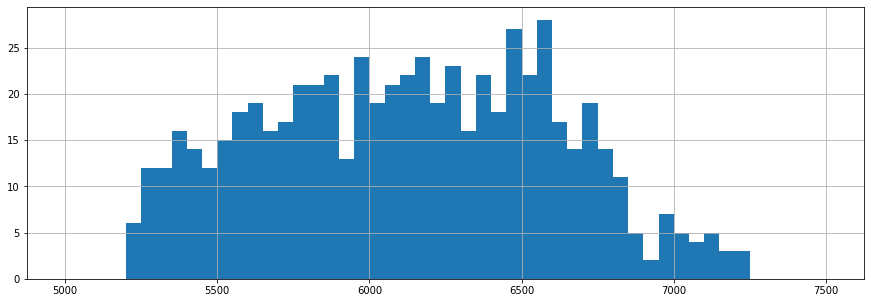

In [34]:
#построение гистаграммы по столбцу удой_кг
ferma_main['удой_кг'].hist(bins=50, range = (5000, 7500), figsize=(15, 5))

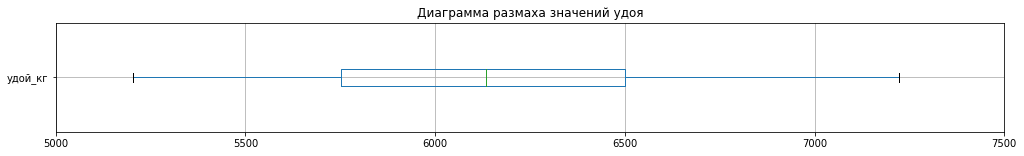

In [35]:
# построение диаграммы размаха по столбцу удой_кг
fig, ax = plt.subplots(figsize = (17,2))
ax = ferma_main[['удой_кг']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений удоя')
ax.set_xlim(5000, 7500);

In [36]:
# вывод числового описания данных 
ferma_main['удой_кг'].describe()

count      629.000000
mean      6188.750397
std       1644.795489
min       5204.000000
25%       5751.000000
50%       6133.000000
75%       6501.000000
max      45616.000000
Name: удой_кг, dtype: float64

In [37]:
ferma_main = ferma_main[ferma_main['удой_кг'] < 7500]

По приведенным графикам можно сделать вывод, что значения столбца удой_кг имеют выбросы, которые были удалены для предотвращения искажения данных в дальнейшем. Полученная гистограмма показывает, что значения столбца удой не имеет нормальное распределение.

<AxesSubplot:>

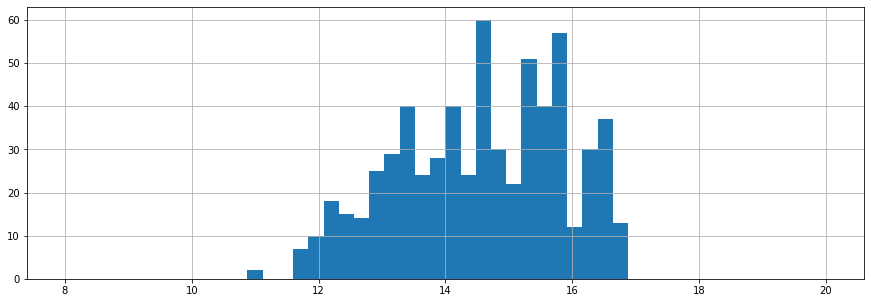

In [38]:
#построение гистаграммы по столбцу эке_энергетическая_кормовая_единица
ferma_main['эке_энергетическая_кормовая_единица'].hist(bins=50, range = (8, 20), figsize=(15, 5))

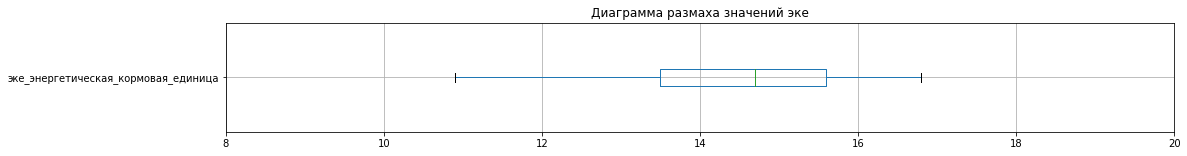

In [39]:
# построение диаграммы размаха по столбцу эке_энергетическая_кормовая_единица
fig, ax = plt.subplots(figsize = (17,2))
ax = ferma_main[['эке_энергетическая_кормовая_единица']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений эке')
ax.set_xlim(8, 20);

In [40]:
# вывод числового описания данных 
ferma_main['эке_энергетическая_кормовая_единица'].describe()

count    628.000000
mean      14.548726
std        1.301777
min       10.900000
25%       13.500000
50%       14.700000
75%       15.600000
max       16.800000
Name: эке_энергетическая_кормовая_единица, dtype: float64

По данным графиков столбца эке_энергетическая_кормовая_единица можно сказать, что среднее значение схоже с медианой, столбец не имеет выбросов, а значения находятся в диапазоне от 10.9 до 16.8. Полученная гистограмма показывает, что значения столбца эке не имеет нормальное распределение. 

<AxesSubplot:>

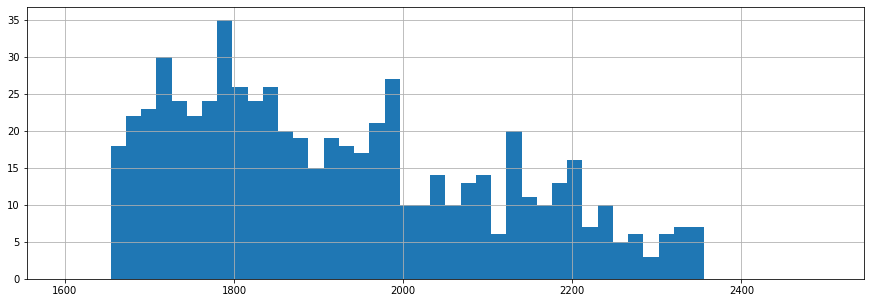

In [41]:
#построение гистаграммы по столбцу сырой_протеин_г
ferma_main['сырой_протеин_г'].hist(bins=50, range = (1600, 2500), figsize=(15, 5))

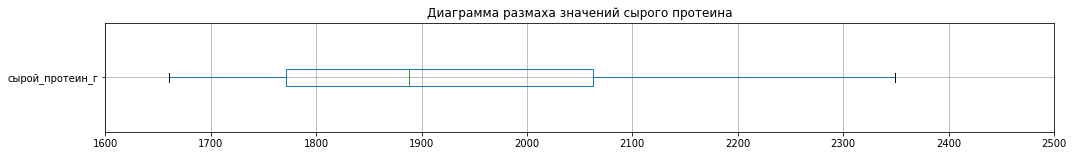

In [42]:
# построение диаграммы размаха по столбцу сырой_протеин_г
fig, ax = plt.subplots(figsize = (17,2))
ax = ferma_main[['сырой_протеин_г']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений сырого протеина')
ax.set_xlim(1600, 2500);

In [43]:
# вывод числового описания данных 
ferma_main['сырой_протеин_г'].describe()

count     628.000000
mean     1923.759554
std       182.832816
min      1660.000000
25%      1771.750000
50%      1888.000000
75%      2062.250000
max      2349.000000
Name: сырой_протеин_г, dtype: float64

По полученным гистограмме, диаграмме размаха и числовому описанию данных можно сделать вывод, что столбец сырой_протеин_г не имеет выбросов, среднее схоже с медианой, а диапазон значений от 1660 до 2349 г. Полученная гистограмма показывает, что значения столбца сырой протеин не имеет нормальное распределение. 

<AxesSubplot:>

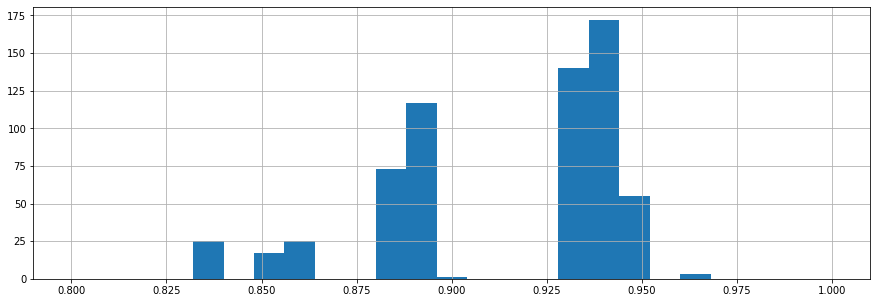

In [44]:
#построение гистаграммы по столбцу спо_сахаро_протеиновое_соотношение
ferma_main['спо_сахаро_протеиновое_соотношение'].hist(bins=25, range = (0.8, 1), figsize=(15, 5))

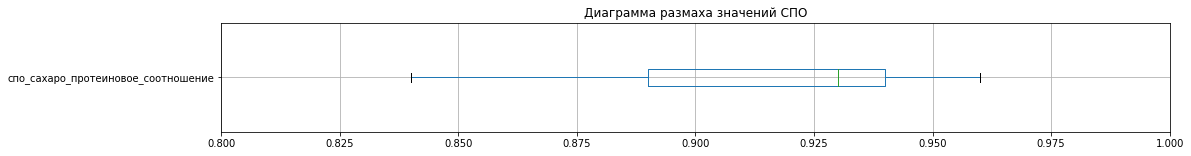

In [45]:
# построение диаграммы размаха по столбцу спо_сахаро_протеиновое_соотношение
fig, ax = plt.subplots(figsize = (17,2))
ax = ferma_main[['спо_сахаро_протеиновое_соотношение']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений СПО')
ax.set_xlim(0.8, 1);

In [46]:
# вывод числового описания данных 
ferma_main['спо_сахаро_протеиновое_соотношение'].describe()

count    628.000000
mean       0.913089
std        0.032221
min        0.840000
25%        0.890000
50%        0.930000
75%        0.940000
max        0.960000
Name: спо_сахаро_протеиновое_соотношение, dtype: float64

По приведенным графикам можно сделать вывод, данные столбца выбросов не имеют, модой является значение 0.93, а значения столбца лежат в диапазоне от 0.84 до 0.96. Полученная гистограмма показывает, что значения столбца СПО не имеет нормальное распределение. 

<AxesSubplot:>

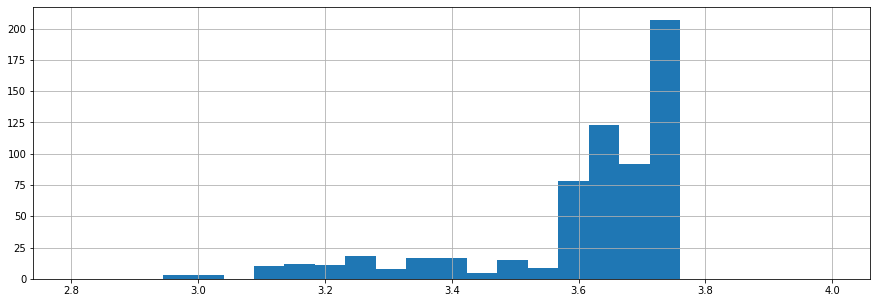

In [47]:
#построение гистаграммы по столбцу жирность_%
ferma_main['жирность_%'].hist(bins=25, range = (2.8, 4), figsize=(15, 5))

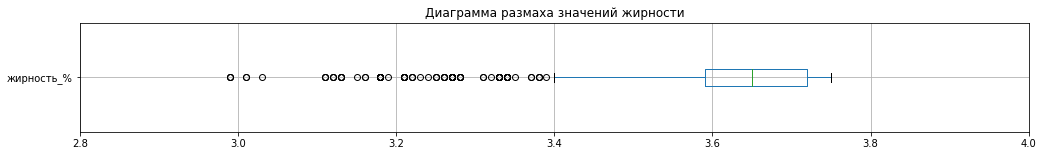

In [48]:
# построение диаграммы размаха по столбцу жирность_%
fig, ax = plt.subplots(figsize = (17,2))
ax = ferma_main[['жирность_%']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений жирности')
ax.set_xlim(2.8, 4);

In [49]:
# вывод числового описания данных 
ferma_main['жирность_%'].describe()

count    628.000000
mean       3.604268
std        0.168093
min        2.990000
25%        3.590000
50%        3.650000
75%        3.720000
max        3.750000
Name: жирность_%, dtype: float64

По данным графиков столбца жирность_% можно сказать, что большая часть значений находится в диапазоне от 3.6 до 3.75%, данные имеют выбросы с левой стороны диаграмма размаха. Полученная гистограмма показывает, что значения столбца жирность не имеет нормальное распределение. 

<AxesSubplot:>

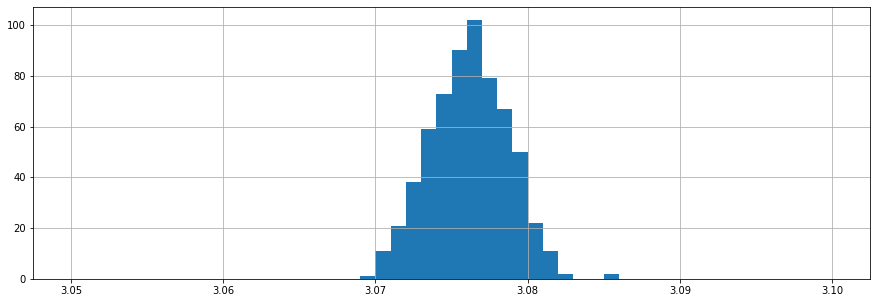

In [50]:
#построение гистаграммы по столбцу белок_%
ferma_main['белок_%'].hist(bins=50, range = (3.05, 3.1), figsize=(15, 5))

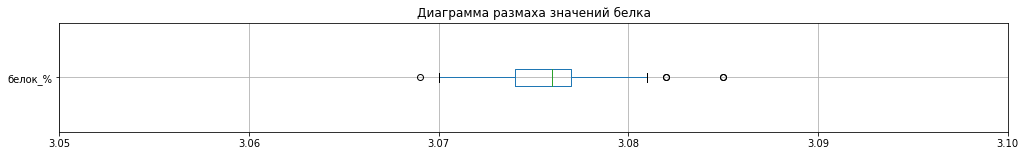

In [51]:
# построение диаграммы размаха по столбцу белок_%
fig, ax = plt.subplots(figsize = (17,2))
ax = ferma_main[['белок_%']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений белка')
ax.set_xlim(3.05, 3.1);

In [52]:
# вывод числового описания данных 
ferma_main['белок_%'].describe()

count    628.000000
mean       3.075670
std        0.002551
min        3.069000
25%        3.074000
50%        3.076000
75%        3.077000
max        3.085000
Name: белок_%, dtype: float64

По полученным гистограмме, диаграмме размаха и числовому описанию данных можно сделать вывод, что данные имеют нормальное распределение, некоторое количество выбросов, а модой является значение 3.077. Полученная гистограмма показывает, что значения столбца белок имеет нормальное распределение. 

<AxesSubplot:>

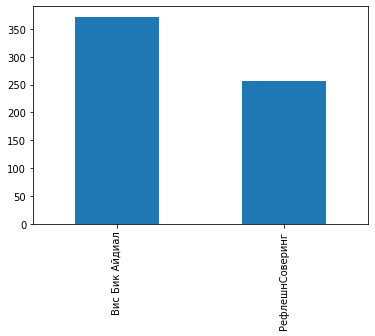

In [53]:
# построение столбчатой диаграммы
ferma_main['порода'].value_counts().plot(kind='bar')

По данной столбчатой диаграмме можно сказать, что коровы породы Вик Бик Айдиал преобладают над коровами породы РефлешнСоверинг.

<AxesSubplot:>

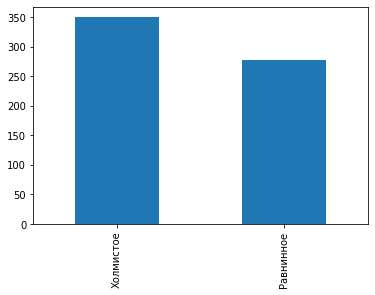

In [54]:
# построение столбчатой диаграммы по столбцу тип_пастбища
ferma_main['тип_пастбища'].value_counts().plot(kind='bar')

По столбчатой диаграмме столбца тип_пастбища можно сделать вывод, что коровы чаще были на холмистом пастбище, чем на равнинном.

<AxesSubplot:>

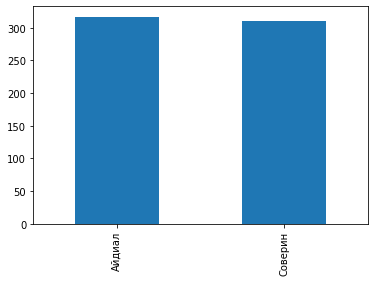

In [55]:
# построение столбчатой диаграммы по столбцу порода_папы_быка
ferma_main['порода_папы_быка'].value_counts().plot(kind='bar')

По полученной столбчатой диаграмме можно прийти к выводу, что породы папы быка встречаются в датафрейме с одинаковой частотой.

<AxesSubplot:>

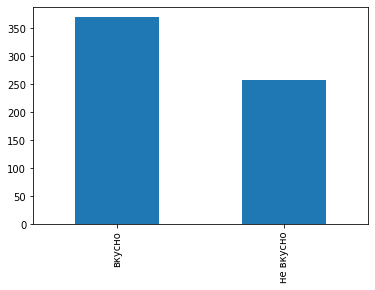

In [56]:
# построение столбчатой диаграммы по столбцу вкус_молока
ferma_main['вкус_молока'].value_counts().plot(kind='bar')

По данной столбчатой диаграмме можно сказать, что коровы дают чаще вкусное молоко, чем не вкусное. 

<AxesSubplot:>

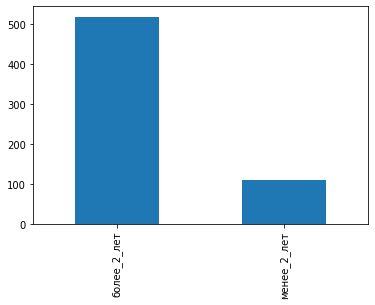

In [57]:
# построение столбчатой диаграммы по столбцу возраст
ferma_main['возраст'].value_counts().plot(kind='bar')

Исходя из полученной столбчатой диаграммы можно сделать вывод, что большей части коров более 2 лет. 

<AxesSubplot:>

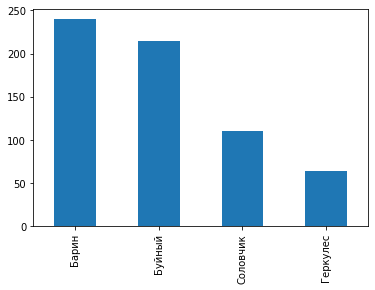

In [58]:
# построение столбчатой диаграммы по столбцу имя_папы
ferma_dad['имя_папы'].value_counts().plot(kind='bar')

По полученной столбчатой диаграмме можно сказать, что Барин является лидером среди всех имен, Геркулес - аутсайдером. Также стоит отметить, что имя Буйный также встречается довольно часто. 

<AxesSubplot:>

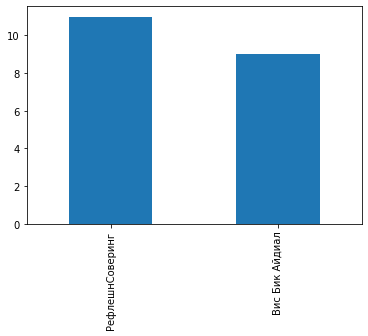

In [59]:
#построение столбчатой диаграммы по столбцу порода
cow_buy['порода'].value_counts().plot(kind='bar')

По данным столбчатой диаграммы можно сделать вывод, что в датафрейме cow_buy породы Вис Бик Айдиал и РефлешнСоверинг всречаются поровну. 

<AxesSubplot:>

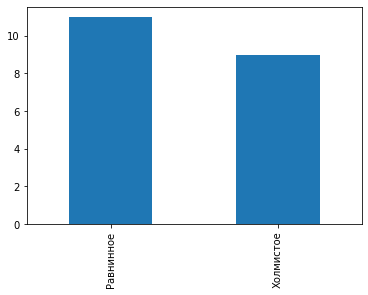

In [60]:
#построение столбчатой диаграммы по столбцу тип_пастбища
cow_buy['тип_пастбища'].value_counts().plot(kind='bar')

Исходя из полученной столбчатой диаграммы можно сделать вывод, что холмистый и равнинный типы пастбищ встречаются одинаковое количество раз.

<AxesSubplot:>

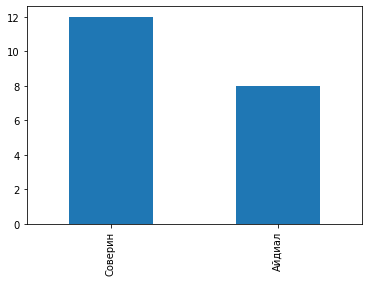

In [61]:
#построение столбчатой диаграммы по столбцу порода_папы_быка
cow_buy['порода_папы_быка'].value_counts().plot(kind='bar')

Данная столбчатая диаграмма показывает, что порода папы быка Соверин преобладает над породой Айдиал

<AxesSubplot:>

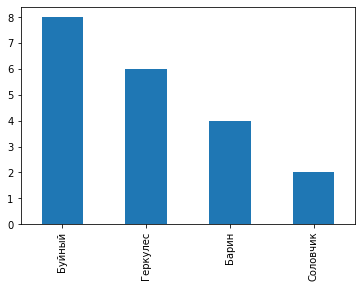

In [62]:
#построение столбчатой диаграммы по столбцу имя_папы
cow_buy['имя_папы'].value_counts().plot(kind='bar')

Полученная столбчатая диаграмма показывает, что имя папы Буйный преобладает над остальными, а Барин и Соловчик встречаются в 3.5 раза реже. 

<AxesSubplot:>

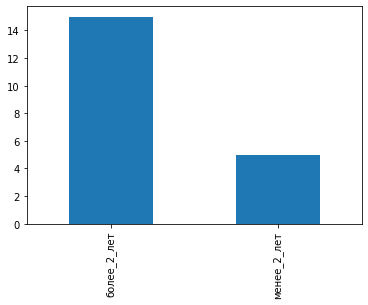

In [63]:
#построение столбчатой диаграммы по столбцу возраст
cow_buy['возраст'].value_counts().plot(kind='bar')

По полученной столбчатой диаграмме можно сделать вывод, что возраст коров датафрейма cow_buy в 2/3 случаев составляет более 2 лет.

<AxesSubplot:>

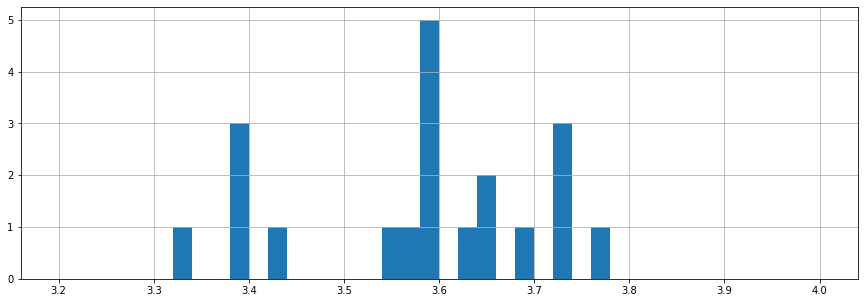

In [64]:
#построение гистаграммы по столбцу текущая_жирность_%
cow_buy['текущая_жирность_%'].hist(bins=40, range = (3.2,4), figsize=(15, 5))

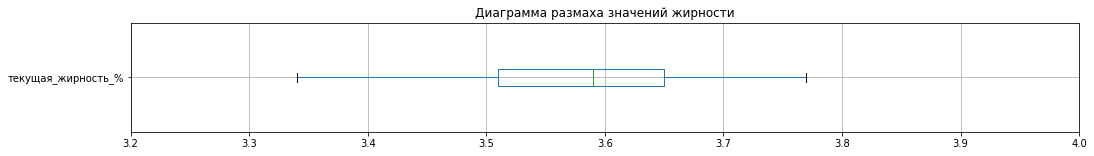

In [65]:
# построение диаграммы размаха по столбцу текущая_жирность_%
fig, ax = plt.subplots(figsize = (17,2))
ax = cow_buy[['текущая_жирность_%']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений жирности')
ax.set_xlim(3.2, 4);

In [66]:
# вывод числового описания данных 
cow_buy['текущая_жирность_%'].describe()

count    20.000000
mean      3.577500
std       0.126818
min       3.340000
25%       3.510000
50%       3.590000
75%       3.650000
max       3.770000
Name: текущая_жирность_%, dtype: float64

Данные графики показывают, что столбец текущая_жирность_% не имеет выбросов, среднее значение и медиана почти равны, а стандарное отклонение составляет 0.14. Полученная гистограмма показывает, что значения столбца текущая жирность не имеет нормальное распределение.

<AxesSubplot:>

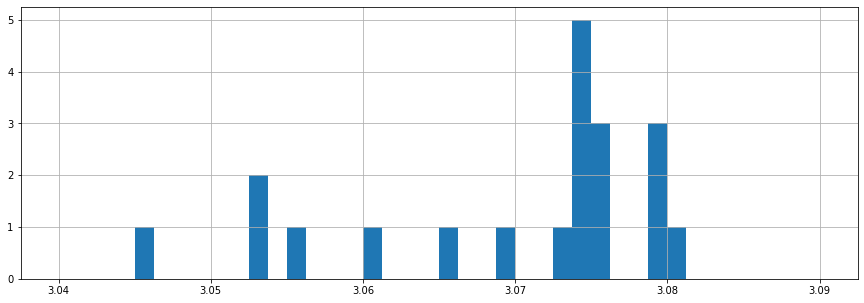

In [67]:
#построение гистаграммы по столбцу текущий_уровень_белок_%
cow_buy['текущий_уровень_белок_%'].hist(bins=40, range = (3.04, 3.09), figsize=(15, 5))

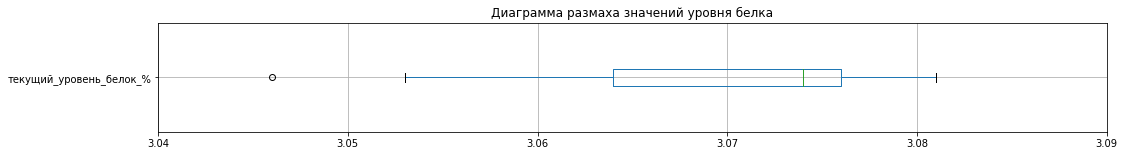

In [68]:
# построение диаграммы размаха по столбцу текущий_уровень_белок_%
fig, ax = plt.subplots(figsize = (17,2))
ax = cow_buy[['текущий_уровень_белок_%']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений уровня белка')
ax.set_xlim(3.04, 3.09);

In [69]:
# вывод числового описания данных 
cow_buy['текущий_уровень_белок_%'].describe()

count    20.000000
mean      3.069500
std       0.010339
min       3.046000
25%       3.064000
50%       3.074000
75%       3.076000
max       3.081000
Name: текущий_уровень_белок_%, dtype: float64

Данные столбца текущий уровень белок % показывают, что среди значений нет выбросов, медиана смещена ближе к правой границе межквартильного размаха, а модой является значение 3.079. Полученная гистограмма показывает, что значения столбца текущий уровень белок не имеет нормальное распределение.

**Вывод:**\
В результате выполнения исследовательского анализа данных можно сказать, что во всех датафреймах данные количественных признаков не имеют выбросов (за исключением столбцов жирности и белка в датафрейме ferma main), значение среднего значения близко к значению медианы, а стандартное отклонение относительно невелико. Нормальное распределение имеет только признак белок в датафрейме ferma main.\
О категориальных признаках можно сделать вывод, что данные в датафреймах поделены примерно одинаково, за исключением признака возраст: там преобладает значение более 2 лет в обоих датафреймах ferma main и cow_buy.

## Корреляционный анализ

In [70]:
# установка модуля phik
!pip install phik

In [71]:
import phik

In [72]:
# опредление коэффициентов с помощью phik_matrix()
ferma_main[['удой_кг', 
            'эке_энергетическая_кормовая_единица',
            'сырой_протеин_г',
            'спо_сахаро_протеиновое_соотношение',
            'тип_пастбища',
            'порода_папы_быка',
            'жирность_%',
            'белок_%']
].phik_matrix()

interval columns not set, guessing: ['удой_кг', 'эке_энергетическая_кормовая_единица', 'сырой_протеин_г', 'спо_сахаро_протеиновое_соотношение', 'жирность_%', 'белок_%']


,удой_кг,эке_энергетическая_кормовая_единица,сырой_протеин_г,спо_сахаро_протеиновое_соотношение,тип_пастбища,порода_папы_быка,жирность_%,белок_%
удой_кг,1.000000,0.720719,0.463224,0.661359,0.279540,0.519915,0.707654,0.058970
эке_энергетическая_кормовая_единица,0.720719,1.000000,0.456484,0.591190,0.106758,0.171355,0.715914,0.000000
сырой_протеин_г,0.463224,0.456484,1.000000,0.387188,0.096474,0.000000,0.397380,0.202474
спо_сахаро_протеиновое_соотношение,0.661359,0.591190,0.387188,1.000000,0.155349,0.425601,0.645581,0.073787
тип_пастбища,0.279540,0.106758,0.096474,0.155349,1.000000,0.000000,0.000000,0.099908
порода_папы_быка,0.519915,0.171355,0.000000,0.425601,0.000000,1.000000,0.000000,0.134582
жирность_%,0.707654,0.715914,0.397380,0.645581,0.000000,0.000000,1.000000,0.000000
белок_%,0.058970,0.000000,0.202474,0.073787,0.099908,0.134582,0.000000,1.000000


По данным расчета коэффициентов корелляции можно сказать, что высокая прямая связь между целевым признаком удой и входными признаками ЭКЕ и жирность, заметная прямая связь между удоем и СПО, породой папы быка. По полученной матрице корреляции можно сдлеать вывод, что мультиколлинеарность между признаками отсутствует.

<AxesSubplot:xlabel='удой_кг', ylabel='сырой_протеин_г'>

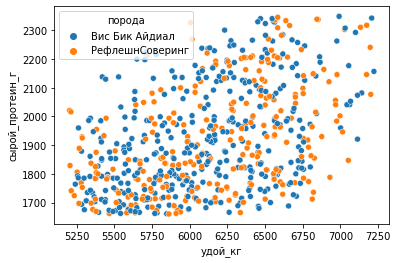

In [73]:
#построение диаграммы рассеяния "удой-сырой_протеин_г-порода"
sns.scatterplot(data = ferma_main, x = 'удой_кг', y = 'сырой_протеин_г', hue = 'порода') 

По данной диаграмме рассеяния не прослеживается линейная зависимость между целевым признаком 'удой_кг' и входным 'сырой_протеин_г'. Также стоит отметить, что нет зависимости данных признаков от породы.

<AxesSubplot:xlabel='удой_кг', ylabel='сырой_протеин_г'>

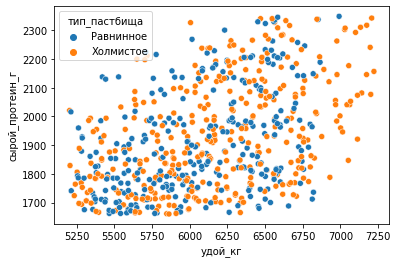

In [74]:
#построение диаграммы рассеяния "удой-сырой_протеин_г-тип_пастбища"
sns.scatterplot(data = ferma_main, x = 'удой_кг', y = 'сырой_протеин_г', hue = 'тип_пастбища') 

По данной диаграмме рассеяния стоит отметить, что удой более 7000 кг дают коровы с типом пастбища "Холмистое".  

<AxesSubplot:xlabel='удой_кг', ylabel='сырой_протеин_г'>

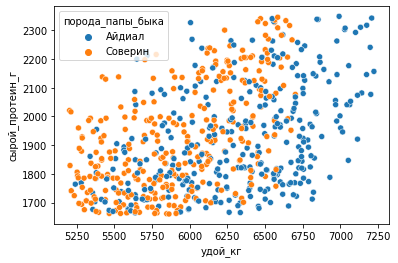

In [75]:
#построение диаграммы рассеяния "удой-сырой_протеин_г-порода_папы_быка"
sns.scatterplot(data = ferma_main, x = 'удой_кг', y = 'сырой_протеин_г', hue = 'порода_папы_быка') 

Данная диаграмма рассеяния показывает, что удой более 6750 кг в год дают коровы породы "Айдиал".

<AxesSubplot:xlabel='удой_кг', ylabel='сырой_протеин_г'>

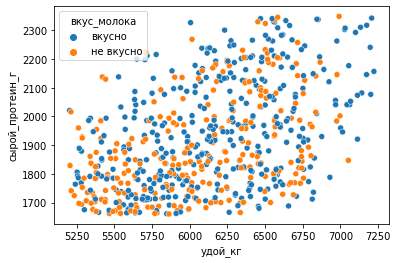

In [76]:
#построение диаграммы рассеяния "удой-сырой_протеин_г-вкус_молока"
sns.scatterplot(data = ferma_main, x = 'удой_кг', y = 'сырой_протеин_г', hue = 'вкус_молока') 

По данной диаграмме рассеяния стоит отметить, что нет зависимости данных признаков от вкуса молока.

<AxesSubplot:xlabel='удой_кг', ylabel='сырой_протеин_г'>

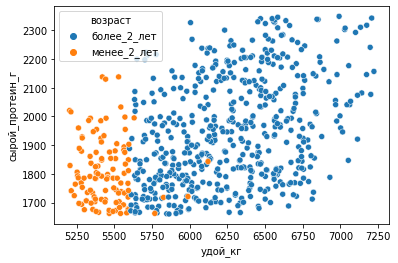

In [77]:
#построение диаграммы рассеяния "удой-сырой_протеин_г-возраст"
sns.scatterplot(data = ferma_main, x = 'удой_кг', y = 'сырой_протеин_г', hue = 'возраст') 

Данная диаграмма рассеяния показывает, что есть четкое разделение по удою в зависимости от возраста. Удой более 5600 кг в год дают коровы с возрастом более 2 лет

<AxesSubplot:xlabel='удой_кг', ylabel='эке_энергетическая_кормовая_единица'>

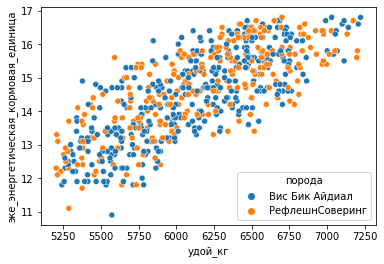

In [78]:
#построение диаграммы рассеяния "удой-эке_энергетическая_кормовая_единица-порода"
sns.scatterplot(data = ferma_main, x = 'удой_кг', y = 'эке_энергетическая_кормовая_единица', hue = 'порода') 

По полученной диаграмме рассеяния можно сделатьь вывод о том, что между целевым признаком 'удой_кг' и входным признаком 'эке_энергетическая_кормовая_единица' есть линейная прямая связь. Зависимость этих признаков от породы не прослеживается.

<AxesSubplot:xlabel='удой_кг', ylabel='эке_энергетическая_кормовая_единица'>

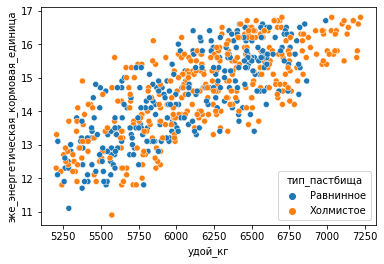

In [79]:
#построение диаграммы рассеяния "удой-эке_энергетическая_кормовая_единица-тип_пастбища"
sns.scatterplot(data = ferma_main, x = 'удой_кг', y = 'эке_энергетическая_кормовая_единица', hue = 'тип_пастбища') 

По данной диаграмме рассеяния стоит отметить, что удой более 7000 кг дают коровы с типом пастбища "Холмистое".

<AxesSubplot:xlabel='удой_кг', ylabel='эке_энергетическая_кормовая_единица'>

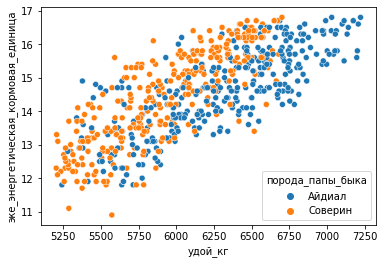

In [80]:
#построение диаграммы рассеяния "удой-эке_энергетическая_кормовая_единица-порода_папы_быка"
sns.scatterplot(data = ferma_main, x = 'удой_кг', y = 'эке_энергетическая_кормовая_единица', hue = 'порода_папы_быка') 

Данная диаграмма рассеяния показывает, что удой более 6750 кг в год дают коровы породы "Айдиал". Также стоит отметить, что при одном и том же значении ЭКЕ коровы породы "Айдиал" дают больший удой.

<AxesSubplot:xlabel='удой_кг', ylabel='эке_энергетическая_кормовая_единица'>

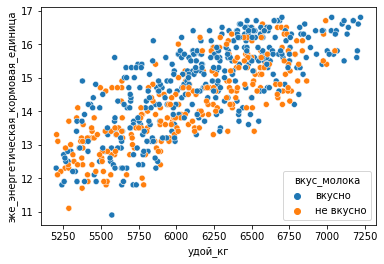

In [81]:
#построение диаграммы рассеяния "удой-эке_энергетическая_кормовая_единица-вкус_молока"
sns.scatterplot(data = ferma_main, x = 'удой_кг', y = 'эке_энергетическая_кормовая_единица', hue = 'вкус_молока') 

По данной диаграмме рассеяния стоит отметить, что нет зависимости данных признаков от вкуса молока.

<AxesSubplot:xlabel='удой_кг', ylabel='эке_энергетическая_кормовая_единица'>

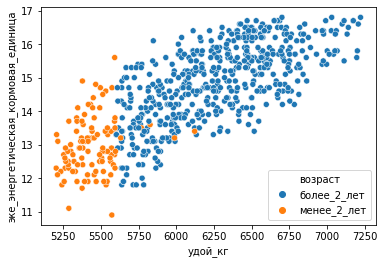

In [82]:
#построение диаграммы рассеяния "удой-эке_энергетическая_кормовая_единица-возраст"
sns.scatterplot(data = ferma_main, x = 'удой_кг', y = 'эке_энергетическая_кормовая_единица', hue = 'возраст') 

Данная диаграмма рассеяния показывает, что есть четкое разделение по удою в зависимости от возраста. Удой более 5600 кг в год дают коровы с возрастом более 2 лет.

<AxesSubplot:xlabel='удой_кг', ylabel='спо_сахаро_протеиновое_соотношение'>

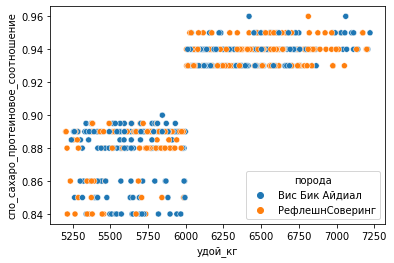

In [83]:
#построение диаграммы рассеяния "удой-спо_сахаро_протеиновое_соотношение-порода"
sns.scatterplot(data = ferma_main, x = 'удой_кг', y = 'спо_сахаро_протеиновое_соотношение', hue = 'порода')

По полученной диаграмме рассеяния можно сделать вывод  между целевым признаком 'удой_кг' и входным признаком 'спо_сахаро_протеиновое_соотношение' нет линейной зависимости, но стоит отметить, что ест четкая граница разделения, равная 0,92, ниже которой коровы дают удой 6000 кг и менее.

<AxesSubplot:xlabel='удой_кг', ylabel='спо_сахаро_протеиновое_соотношение'>

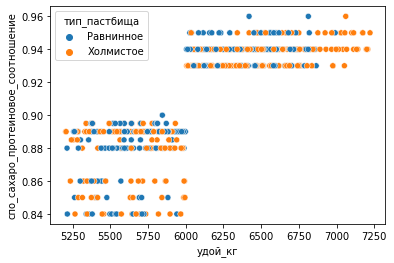

In [84]:
#построение диаграммы рассеяния "удой-спо_сахаро_протеиновое_соотношение-тип_пастбища"
sns.scatterplot(data = ferma_main, x = 'удой_кг', y = 'спо_сахаро_протеиновое_соотношение', hue = 'тип_пастбища')

По данной диаграмме рассеяния не прослеживается зависимость между признаками 'удой_кг', 'спо_сахаро_протеиновое_соотношение' и признаком 'тип_пастбища'

<AxesSubplot:xlabel='удой_кг', ylabel='спо_сахаро_протеиновое_соотношение'>

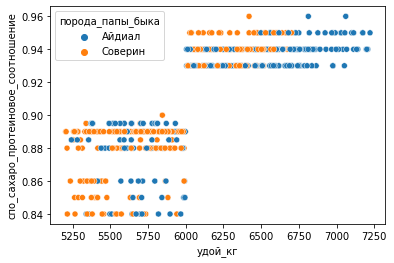

In [85]:
#построение диаграммы рассеяния "удой-спо_сахаро_протеиновое_соотношение-порода_папы_быка"
sns.scatterplot(data = ferma_main, x = 'удой_кг', y = 'спо_сахаро_протеиновое_соотношение', hue = 'порода_папы_быка')

Данная диаграмма рассеяния показывает, что при СПО большем 0.92 большую часть коров, дающие удой более 6000 кг в год, являются коровы породы "Айдиал", а удой более 6750 кг дают коровы только этой породы.

<AxesSubplot:xlabel='удой_кг', ylabel='спо_сахаро_протеиновое_соотношение'>

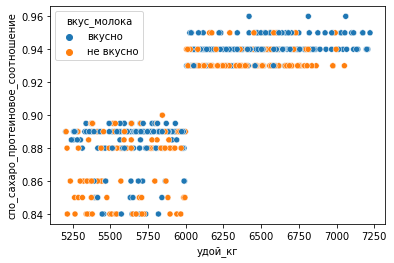

In [86]:
#построение диаграммы рассеяния "удой-спо_сахаро_протеиновое_соотношение-вкус_молока"
sns.scatterplot(data = ferma_main, x = 'удой_кг', y = 'спо_сахаро_протеиновое_соотношение', hue = 'вкус_молока')

По данной диаграмме рассеяния не прослеживается зависимость между признаками 'удой_кг', 'спо_сахаро_протеиновое_соотношение' и признаком 'вкус_молока'

<AxesSubplot:xlabel='удой_кг', ylabel='спо_сахаро_протеиновое_соотношение'>

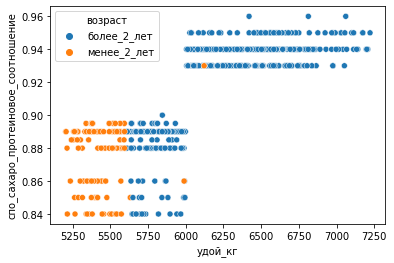

In [87]:
#построение диаграммы рассеяния "удой-спо_сахаро_протеиновое_соотношение-возраст"
sns.scatterplot(data = ferma_main, x = 'удой_кг', y = 'спо_сахаро_протеиновое_соотношение', hue = 'возраст')

Данная диаграмма рассеяния показывает, что есть четкое разделение по удою в зависимости от возраста. Удой более 5600 кг в год дают коровы с возрастом более 2 лет.

<AxesSubplot:xlabel='удой_кг', ylabel='жирность_%'>

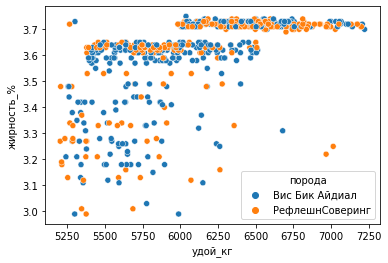

In [88]:
#построение диаграммы рассеяния "удой-жирность_%-порода"
sns.scatterplot(data = ferma_main, x = 'удой_кг', y = 'жирность_%', hue = 'порода')

По полученной диаграмме рассеяния можно сделать вывод между целевым признаком 'удой_кг' и входным признаком 'жирность_%' нет линейной зависимости, но стоит отметить, что большая часть значений столбца 'жирность_%' лежит в диапазоне от 3,6 до 3,8 %.

<AxesSubplot:xlabel='удой_кг', ylabel='жирность_%'>

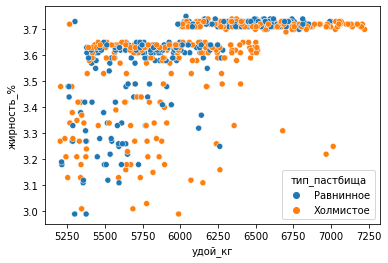

In [89]:
#построение диаграммы рассеяния "удой-жирность_%-порода"
sns.scatterplot(data = ferma_main, x = 'удой_кг', y = 'жирность_%', hue = 'тип_пастбища')

По данной диаграмме рассеяния не прослеживается зависимость между признаками 'удой_кг', 'жирность_%' и признаком 'тип_пастбища'.

<AxesSubplot:xlabel='удой_кг', ylabel='жирность_%'>

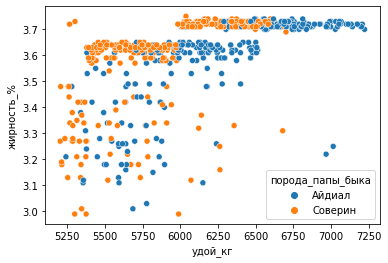

In [90]:
#построение диаграммы рассеяния "удой-жирность_%-порода_папы_быка"
sns.scatterplot(data = ferma_main, x = 'удой_кг', y = 'жирность_%', hue = 'порода_папы_быка')

Данная даграмма рассеяния показывает, что при одном и том же значении жирности коровы породы "Айдиал" дают больший удой.

<AxesSubplot:xlabel='удой_кг', ylabel='жирность_%'>

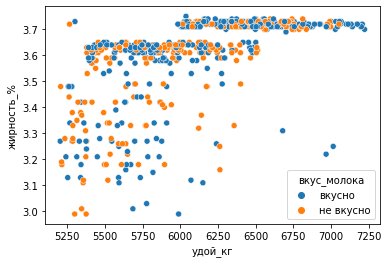

In [91]:
#построение диаграммы рассеяния "удой-жирность_%-вкус_молока"
sns.scatterplot(data = ferma_main, x = 'удой_кг', y = 'жирность_%', hue = 'вкус_молока')

По данной диаграмме рассеяния не прослеживается зависимость между признаками 'удой_кг', 'жирность_%' и признаком 'вкус_молока'.

<AxesSubplot:xlabel='удой_кг', ylabel='жирность_%'>

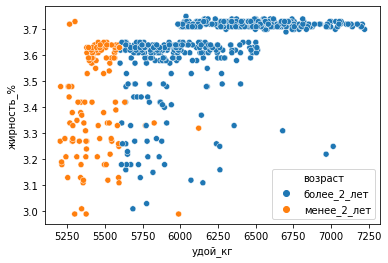

In [92]:
#построение диаграммы рассеяния "удой-жирность_%-возраст"
sns.scatterplot(data = ferma_main, x = 'удой_кг', y = 'жирность_%', hue = 'возраст')

Данная диаграмма рассеяния показывает, что есть четкое разделение по удою в зависимости от возраста. Удой более 5600 кг в год дают коровы с возрастом более 2 лет.

<AxesSubplot:xlabel='удой_кг', ylabel='белок_%'>

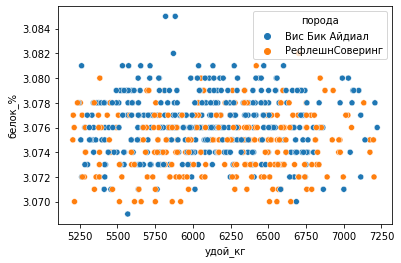

In [93]:
#построение диаграммы рассеяния "удой-белок_%-порода"
sns.scatterplot(data = ferma_main, x = 'удой_кг', y = 'белок_%', hue = 'порода')

По полученной диаграмме рассеяния можно сделать вывод между целевым признаком 'удой кг' и входным признаком 'белок %' нет линейной зависимости.

<AxesSubplot:xlabel='удой_кг', ylabel='белок_%'>

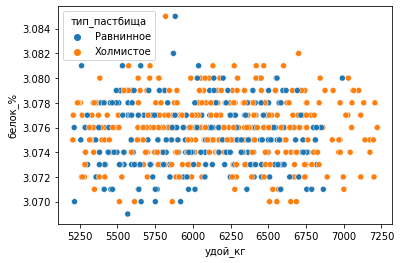

In [94]:
#построение диаграммы рассеяния "удой-белок_%-тип_пастбища"
sns.scatterplot(data = ferma_main, x = 'удой_кг', y = 'белок_%', hue = 'тип_пастбища')

По данной диаграмме рассеяния стоит отметить, что удой более 7000 кг дают коровы с типом пастбища "Холмистое".

<AxesSubplot:xlabel='удой_кг', ylabel='белок_%'>

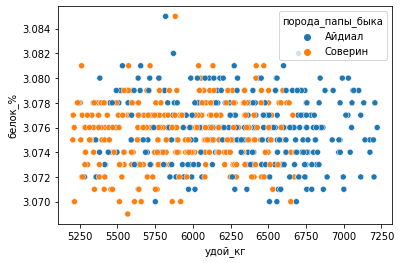

In [95]:
#построение диаграммы рассеяния "удой-белок_%-порода_папы_быка"
sns.scatterplot(data = ferma_main, x = 'удой_кг', y = 'белок_%', hue = 'порода_папы_быка')

Данная диаграмма рассеяния показывает, что удой более 6750 кг в год дают коровы только породы "Айдиал".

<AxesSubplot:xlabel='удой_кг', ylabel='белок_%'>

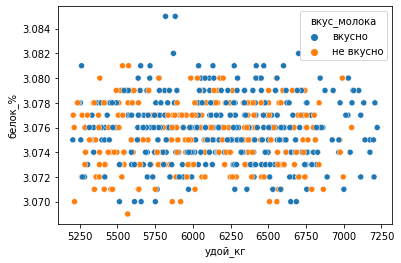

In [96]:
#построение диаграммы рассеяния "удой-белок_%-вкус_молока"
sns.scatterplot(data = ferma_main, x = 'удой_кг', y = 'белок_%', hue = 'вкус_молока')

По данной диаграмме рассеяния не прослеживается зависимость между признаками 'удой кг', 'белок %' и признаком 'вкус молока'.

<AxesSubplot:xlabel='удой_кг', ylabel='белок_%'>

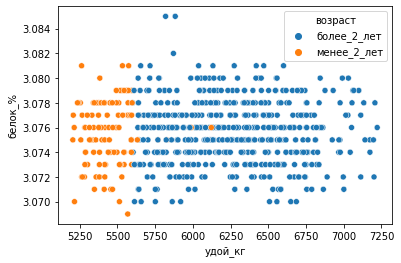

In [97]:
#построение диаграммы рассеяния "удой-белок_%-возраст"
sns.scatterplot(data = ferma_main, x = 'удой_кг', y = 'белок_%', hue = 'возраст')

Данная диаграмма рассеяния показывает, что есть четкое разделение по удою в зависимости от возраста. Удой более 5600 кг в год дают коровы с возрастом более 2 лет.

**Вывод**\
В результате выполнения корреляционного анализа можно сделать вывод о том, что с целевым признаком линейной высокой прямой связью обладает только входной признак 'эке_энергетическая_кормовая_единица'. Также стоит отметить, что есть явная связь между целевым признаком 'удой_кг' и такими категориальными признаками как 'возраст', 'тип пастбища', 'порода'.\
Мультиколлинеарность между признаками не наблюдается.

## Обучение модели линейной регрессии

In [98]:
# создание константы RANDOM_STATE
RANDOM_STATE = 42

In [99]:
# сохранение входных признаков в переменную X
# сохранение целевого признака в переменную y
X = ferma_main.drop(['id', 'удой_кг', 'белок_%', 'жирность_%', 'вкус_молока'], axis=1)
y = ferma_main['удой_кг']

In [100]:
# разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE
)

R2 LinearRegression = 0.7844078173416966
MSE 43887.01500966053
RMSE 209.49227911706086
MAE 164.2419446347493


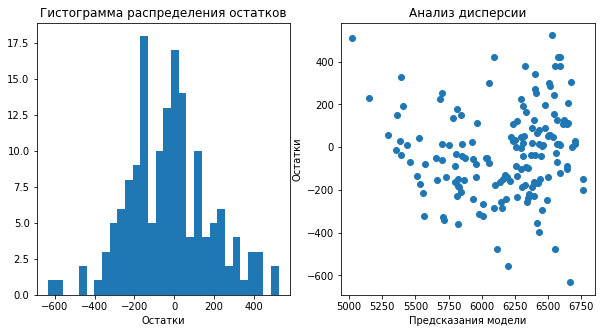

In [101]:
cat_col_names = ['порода', 'тип_пастбища', 'возраст', 'порода_папы_быка']
num_col_names = ['эке_энергетическая_кормовая_единица', 'сырой_протеин_г', 'спо_сахаро_протеиновое_соотношение']

# подготовка признаков (масштабирование и кодирование)

encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

# инициалтзация модели
model_lr = LinearRegression()

# получение оптимальных значений коэффициентов
model_lr.fit(X_train, y_train)

# предсказанные значения для X_test
predictions = model_lr.predict(X_test)

# определение коэффициента детерминации
r2 = r2_score(y_test, predictions)
print("R2 LinearRegression =", r2)

# определение MSE
mse = mean_squared_error(y_test, predictions)
print("MSE", mse)

# определение RMSE
rmse = mean_squared_error(y_test, predictions, squared=False)
print("RMSE", rmse)

# определение MAE
mae = mean_absolute_error(y_test, predictions)
print("MAE", mae)

# расчет остатков
residuals = y_test - predictions

# построение графиков по количественным признакам — гистограммы частотности, распределения и диаграммы рассеяния
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals, bins=30)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(predictions, residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

График симметричен относительно нуля, однако имеет выбросы, следовательно модель что-то упускает. Исходя из анализа дисперсий тоже можно сделать вывод, что модель ошибается неравномерно, так как прослеживается, что на интервале от 5250 до 5750 разброс значений остатков меньше, чем на интервале от 6000 до 6500.

In [102]:
# создание функции по определению типа СПО
def spo_type(row):
    spo = row['спо_сахаро_протеиновое_соотношение']
    if spo >= 0.92:
        return 'более 0.92'
    return 'менее 0.92'

In [103]:
#добавление столбца с типом СПО
ferma_main['spo_type'] = ferma_main.apply(spo_type, axis=1)

In [104]:
ferma_main['эке_в_квадрате'] = ferma_main['эке_энергетическая_кормовая_единица']**2

In [105]:
# сохранение входных признаков в переменную X
# сохранение целевого признака в переменную y
X = ferma_main.drop(['id',
                     'удой_кг', 
                     'эке_энергетическая_кормовая_единица', 
                     'спо_сахаро_протеиновое_соотношение', 
                     'белок_%', 
                     'жирность_%', 
                     'вкус_молока'
], axis=1)
y = ferma_main['удой_кг']

In [106]:
# разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE
)

R2 LinearRegression = 0.8180879926867501
MSE 37030.91131113695
RMSE 192.43417396901452
MAE 149.03965222364602


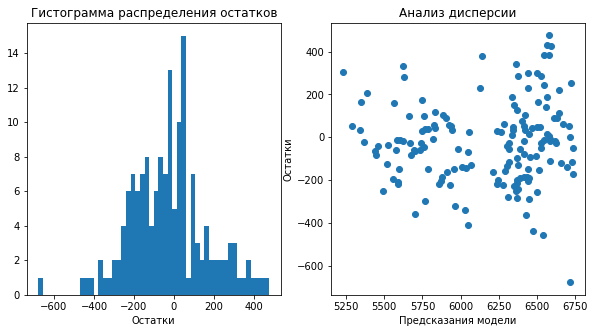

In [107]:
cat_col_names = ['порода', 'тип_пастбища', 'возраст', 'порода_папы_быка', 'spo_type']
num_col_names = ['эке_в_квадрате', 'сырой_протеин_г']

# подготовка признаков (масштабирование и кодирование)

encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

# инициалтзация модели
model_lr = LinearRegression()

# получение оптимальных значений коэффициентов
model_lr.fit(X_train, y_train)

# предсказанные значения для X_test
predictions = model_lr.predict(X_test)

r2 = r2_score(y_test, predictions)
print("R2 LinearRegression =", r2)

mse = mean_squared_error(y_test, predictions)
print("MSE", mse)

rmse = mean_squared_error(y_test, predictions, squared=False)
print("RMSE", rmse)

mae = mean_absolute_error(y_test, predictions)
print("MAE", mae)

# расчет остатков
residuals = y_test - predictions

# построение графиков по количественным признакам — гистограммы частотности, распределения и диаграммы рассеяния
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals, bins=50)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(predictions, residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

График имеет нормальное распределение и чуть смещен вправо относительно нуля, имеет выбросы, следовательно модель что-то упускает. Исходя из анализа дисперсий можно сделать вывод, что модель ошибается неравномерно, так как прослеживается, что на интервале от 5400 до 6000 разброс значений остатков меньше, чем на интервале от 6400 до 6600. И имеется четкая граница разделения, значений в интервале от 6100 до 6200 нет.

In [108]:
ferma_main_dad = pd.merge(ferma_main, ferma_dad, on=['id', 'id'])

In [109]:
# сохранение входных признаков в переменную X
# сохранение целевого признака в переменную y
X = ferma_main_dad.drop(['id',
                         'удой_кг', 
                         'эке_энергетическая_кормовая_единица', 
                         'спо_сахаро_протеиновое_соотношение', 
                         'белок_%', 
                         'жирность_%', 
                         'вкус_молока'
], axis=1)
y = ferma_main_dad['удой_кг']

In [110]:
# разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE
)

R2 LinearRegression = 0.8247542745210408
MSE 35673.88988618191
RMSE 188.8753289505591
MAE 146.16302445362308


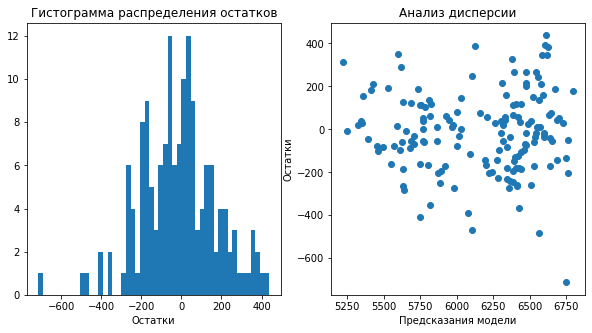

In [111]:
cat_col_names = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'spo_type', 'имя_папы']
num_col_names = ['эке_в_квадрате', 'сырой_протеин_г']

# подготовка признаков (масштабирование и кодирование)

encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

# инициалтзация модели
model_lr1 = LinearRegression()

# получение оптимальных значений коэффициентов
model_lr1.fit(X_train, y_train)

# предсказанные значения для X_test
predictions = model_lr1.predict(X_test)

r2 = r2_score(y_test, predictions)
print("R2 LinearRegression =", r2)

mse = mean_squared_error(y_test, predictions)
print("MSE", mse)

rmse = mean_squared_error(y_test, predictions, squared=False)
print("RMSE", rmse)

mae = mean_absolute_error(y_test, predictions)
print("MAE", mae)

# расчет остатков
residuals = y_test - predictions

# построение графиков по количественным признакам — гистограммы частотности, распределения и диаграммы рассеяния
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes[0].hist(residuals, bins=50)
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(predictions, residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

График имеет нормальное распределение и чуть смещен влево относительно нуля, имеет выбросы. Исходя из анализа дисперсий можно сделать вывод, что модель ошибается равномерно, так как разброс значений почти одинаков на всем интервале значений.

**Вывод:** по данным метрик MSE, MAE, RMSE, R² можно сделать вывод, что каждый раз модель становилась лучше, а её предсказания становились точнее. Поэтому для дальнейших предсказаний следует использовать последнюю модель.

In [112]:
# вывод числового описания данных 
ferma_main['удой_кг'].describe()

count     628.000000
mean     6125.968153
std       475.857053
min      5204.000000
25%      5749.750000
50%      6132.500000
75%      6501.000000
max      7222.000000
Name: удой_кг, dtype: float64

При определении доверительного интервала ошибок модели будет взята метрика RMSE, так как из столбца удой было далено аномальное значение, и его минимальное значение на данный момент составялет 5204 кг, максимальное - 7222 кг. 

In [113]:
# определение первой границы доверительного интервала 
border_interval_1 = np.quantile(residuals, 0.025)
border_interval_1

-393.099637079012

In [114]:
# определение второй границы доверительного интервала 
border_interval_2 = np.quantile(residuals, 0.975)
border_interval_2

355.93715119412155

Границами доверительного интервала, соответствующего значениям 2.5% и 97.5% являются значения -393.1 и 355.9 соответственно.

In [115]:
# добавление новых столбцов в датафрейм cow_buy
cow_buy[['эке_энергетическая_кормовая_единица', 
         'сырой_протеин_г', 
         'спо_сахаро_протеиновое_соотношение']] = ferma_main[['эке_энергетическая_кормовая_единица', 
                                                             'сырой_протеин_г', 
                                                             'спо_сахаро_протеиновое_соотношение']].mean()*1.05

In [116]:
cow_buy

,порода,тип_пастбища,порода_папы_быка,имя_папы,текущая_жирность_%,текущий_уровень_белок_%,возраст,эке_энергетическая_кормовая_единица,сырой_протеин_г,спо_сахаро_протеиновое_соотношение
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,0.958744
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.276162,2019.947532,0.958744
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,2019.947532,0.958744
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.276162,2019.947532,0.958744
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.276162,2019.947532,0.958744
5,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,15.276162,2019.947532,0.958744
6,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.276162,2019.947532,0.958744
7,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,15.276162,2019.947532,0.958744
8,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.276162,2019.947532,0.958744
9,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.276162,2019.947532,0.958744


In [117]:
#добавление столбца с типом СПО
cow_buy['spo_type'] = cow_buy.apply(spo_type, axis=1)

In [118]:
# добавление столбца эке_в_квадрате в датафрейм cow_buy
cow_buy['эке_в_квадрате'] = cow_buy['эке_энергетическая_кормовая_единица']**2

In [119]:
# удаление столбцов, которые не влияют на предсказание модели
X_cow = cow_buy.drop(['эке_энергетическая_кормовая_единица',
                      'спо_сахаро_протеиновое_соотношение',
                      'текущий_уровень_белок_%',
                      'текущая_жирность_%'], axis=1)


In [120]:
X_cow

,порода,тип_пастбища,порода_папы_быка,имя_папы,возраст,сырой_протеин_г,spo_type,эке_в_квадрате
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,более_2_лет,2019.947532,более 0.92,233.361138
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,менее_2_лет,2019.947532,более 0.92,233.361138
2,РефлешнСоверинг,Равнинное,Соверин,Барин,более_2_лет,2019.947532,более 0.92,233.361138
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,более_2_лет,2019.947532,более 0.92,233.361138
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,более_2_лет,2019.947532,более 0.92,233.361138
5,РефлешнСоверинг,Равнинное,Соверин,Геркулес,менее_2_лет,2019.947532,более 0.92,233.361138
6,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,более_2_лет,2019.947532,более 0.92,233.361138
7,Вис Бик Айдиал,Равнинное,Соверин,Буйный,более_2_лет,2019.947532,более 0.92,233.361138
8,РефлешнСоверинг,Равнинное,Соверин,Барин,более_2_лет,2019.947532,более 0.92,233.361138
9,РефлешнСоверинг,Холмистое,Айдиал,Буйный,менее_2_лет,2019.947532,более 0.92,233.361138


In [121]:
# выделение наименования столбцов с категориальными и количественными признаками
cat_col_names = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'spo_type', 'имя_папы',]
num_col_names = ['эке_в_квадрате', 'сырой_протеин_г']

# подготовка признаков (масштабирование и кодирование)

X_cow_ohe = encoder.transform(X_cow[cat_col_names])

encoder_col_names = encoder.get_feature_names()

X_cow_scaled = scaler.transform(X_cow[num_col_names])

X_cow_ohe = pd.DataFrame(X_cow_ohe, columns=encoder_col_names)

X_cow_scaled = pd.DataFrame(X_cow_scaled, columns=num_col_names)

X_cow = pd.concat([X_cow_ohe, X_cow_scaled], axis=1)

# предсказанные значения для X_cow
predictions = model_lr1.predict(X_cow)
predictions

array([6609.91929681, 6378.71102836, 6283.99977532, 6593.08937654,
       6542.14606633, 6425.38021759, 6609.91929681, 6571.25973712,
       6283.99977532, 6400.54066779, 6344.70785976, 6617.92892634,
       6609.91929681, 6127.4747423 , 6283.99977532, 6593.08937654,
       6344.70785976, 6425.38021759, 6571.25973712, 6542.14606633])

Вывод: Были обучены три модели. В результате сравнения метрик трех моделей было принято решение, что наиболее точные предсказания дает последняя модель. Данная модель и была использована для предсказания значений удоя. Исходя из полученных значений в 20 из 20 случаев мы получили удой более 6000 кг.

## Обучение модели логистической регрессии

Accuracy = 0.6242038216560509
Recall = 0.333
Precision = 0.639


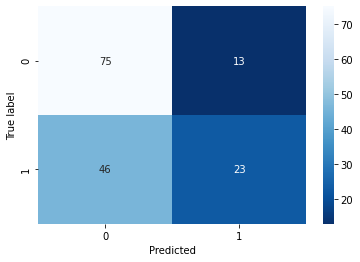

In [122]:
# разбиваем признаки на входные и целевой
X = ferma_main.drop(columns=['id', 'удой_кг', 'эке_энергетическая_кормовая_единица', 
                             'спо_сахаро_протеиновое_соотношение'])
y = ferma_main['вкус_молока']

# разбиваем данные на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE
)

cat_col_names = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'spo_type']
num_col_names = ['эке_в_квадрате', 'сырой_протеин_г', 'жирность_%', 'белок_%'] 

encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

# создаём объект для работы с моделью
clf = LogisticRegression()

# обучаем модель на данных
clf = clf.fit(X_train, y_train)

# получаем прогнозные метки классов
y_pred = clf.predict(X_test)

# проводим оценку точности
acc = accuracy_score(y_test, y_pred)
print("Accuracy =", acc)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted')

recall = recall_score(y_test, y_pred, pos_label='не вкусно')
print("Recall =", round(recall ,3))

precision = precision_score(y_test, y_pred, pos_label='не вкусно')
print("Precision =", round(precision ,3))

В результате обучения модели значения метрик accuracy, recall, precision составили 0.62, 0.33, 0.64 соответственно. Чтобы минимизировать риски от покупки коров, необходимо свести ошибки 1-го рода к минимуму. Это связано с тем, что фермер хочет, чтобы его молоко было вкусным, и если модель предскажет, что это так, а на самом деле молоко окажется не вкусным, это приведет к потерям, что недопустимо. 

In [123]:
y_proba = clf.predict_proba(X_test)[:,1]

data = pd.DataFrame(zip(y_test, y_proba),
             columns = ['y_valid', 'y_proba']).sort_values(by='y_proba',ascending=False)

In [124]:
# определение промежутков для поиска порога классификации
thresholds = [round(i,2) for i in np.linspace(0.1,1,num = 15,endpoint=False)]
print(thresholds) 

[0.1, 0.16, 0.22, 0.28, 0.34, 0.4, 0.46, 0.52, 0.58, 0.64, 0.7, 0.76, 0.82, 0.88, 0.94]


In [125]:
columns = []
for i in thresholds:
    columns.append('y_pred_'+str(i))
    data['y_pred_'+str(i)] = data['y_proba'].apply(lambda x: 1 if x>=i else 0)

In [126]:
data['y_valid']=data['y_valid'].replace(['вкусно','не вкусно'],[1, 0])

In [127]:
thresholds = [round(i,3) for i in np.linspace(0.75, 0.85,num = 10,endpoint=False)]
print(thresholds) 

[0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84]


In [128]:
for i in thresholds:
    columns.append('y_pred_'+str(i))
    data['y_pred_'+str(i)] = data['y_proba'].apply(lambda x: 1 if x>=i else 0)
data.head(10)

,y_valid,y_proba,y_pred_0.1,y_pred_0.16,y_pred_0.22,y_pred_0.28,y_pred_0.34,y_pred_0.4,y_pred_0.46,y_pred_0.52,...,y_pred_0.88,y_pred_0.94,y_pred_0.75,y_pred_0.77,y_pred_0.78,y_pred_0.79,y_pred_0.8,y_pred_0.81,y_pred_0.83,y_pred_0.84
84,0,0.763923,1,1,1,1,1,1,1,1,...,0,0,1,0,0,0,0,0,0,0
119,0,0.715689,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
141,0,0.704255,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
144,0,0.704078,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
23,1,0.690525,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
46,0,0.681796,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
82,1,0.666965,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
102,1,0.663008,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
97,1,0.658239,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
44,0,0.652154,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


Чтобы выбрать порог классификации правильно, необходимо свести значения типа FP к нулю. Минимальное число, при котором значения FalsePositive будут равны 0 и будет являться порогом классификации, брать число выше нецелесообразно. 

In [129]:
dta=data.loc[data['y_valid'] == '0']
y_pred_8_sum = dta['y_pred_0.8'].sum()
y_pred_8_sum

0

In [130]:
threshold = 0.8
y_pred_new_threshold = (clf.predict_proba(X_test)[:, 0] >= threshold).astype(int)
y_pred_new_threshold

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [131]:
y_test = y_test.replace('вкусно', '1')
y_test = y_test.replace('не вкусно', '0')
y_test = y_test.astype(y_pred_new_threshold.dtype)
y_test

582    1
592    1
551    1
214    0
486    1
      ..
84     1
285    1
577    1
80     0
24     0
Name: вкус_молока, Length: 157, dtype: int64

Accuracy = 0.4840764331210191
Recall = 0.08
Precision = 1.0


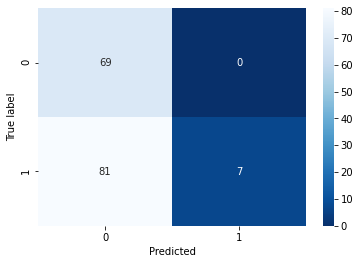

In [132]:
# проводим оценку точности
acc = accuracy_score(y_test, y_pred_new_threshold)
print("Accuracy =", acc)

cm = confusion_matrix(y_test, y_pred_new_threshold)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted')

recall = recall_score(y_test, y_pred_new_threshold)
print("Recall =", round(recall ,3))

precision = precision_score(y_test, y_pred_new_threshold)
print("Precision =", round(precision ,3))

In [133]:
X_cow_log = cow_buy.drop(['эке_энергетическая_кормовая_единица', 'спо_сахаро_протеиновое_соотношение'], axis=1)

X_cow_log = X_cow_log.rename(columns={'текущая_жирность_%':'жирность_%'})
X_cow_log = X_cow_log.rename(columns={'текущий_уровень_белок_%':'белок_%'})
X_cow_log


,порода,тип_пастбища,порода_папы_быка,имя_папы,жирность_%,белок_%,возраст,сырой_протеин_г,spo_type,эке_в_квадрате
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,2019.947532,более 0.92,233.361138
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,2019.947532,более 0.92,233.361138
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,2019.947532,более 0.92,233.361138
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,2019.947532,более 0.92,233.361138
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,2019.947532,более 0.92,233.361138
5,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,2019.947532,более 0.92,233.361138
6,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,2019.947532,более 0.92,233.361138
7,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,2019.947532,более 0.92,233.361138
8,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,2019.947532,более 0.92,233.361138
9,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,2019.947532,более 0.92,233.361138


In [134]:
cat_col_names = ['порода', 'тип_пастбища', 'порода_папы_быка', 'возраст', 'spo_type']
num_col_names = ['эке_в_квадрате', 'сырой_протеин_г', 'жирность_%', 'белок_%'] 

# подготовка признаков (масштабирование и кодирование)

X_cow_log_ohe = encoder.transform(X_cow_log[cat_col_names])

encoder_col_names = encoder.get_feature_names()

X_cow_log_scaled = scaler.transform(X_cow_log[num_col_names])

X_cow_log_ohe = pd.DataFrame(X_cow_log_ohe, columns=encoder_col_names)

X_cow_log_scaled = pd.DataFrame(X_cow_log_scaled, columns=num_col_names)

X_cow_log = pd.concat([X_cow_log_ohe, X_cow_log_scaled], axis=1)

# предсказанные значения для X_cow_log
threshold = 0.8
predictions = (clf.predict_proba(X_cow_log)[:, 0] >= threshold).astype(int)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Итоговые выводы

В результате выполнения проекта были проведены предобработка данных, исследовательский анализ, корреляционных анализ, обучение модели линейной регрессии, обучение модели логистической регрессии.\
На этапе предобработки данных столбцы датафреймов были отредактированы, а также была проведена работа с пропусками, дубликатами и неявными дубликатами для корректной работы в дальнейшем.\
На этапе исследовательского анализа данных были построены гистограммы и диаграммы размаха, а также получены числовые описания данных для определения и учета особенностей признаков датафреймов.\
На этапе корреляционного анализа данных были определены связи между целевым и входными признаками для отбора их в дальнейшем при обучении модели.\
На этапе обучения модели линейной регрессии были получены три модели для прогнозирования удоя, а также выбрана лучшая, исходя из метрик и анализа остатков.\
На этапе обучения модели логистической регрессии была получена модель для прогнозирования вкуса молока, рассчитаны метрики и определен порог классификации для снижения к минимуму потерь для фермера.\
Для того, чтобы улучшить качество модели можно добавить новые признаки, такие как условия содержания, температура, здоровье коровы.\
Рекомендация: для повышения шансов по удою лучше выбирать коров породы "Айдиал", которым более 2 лет, живущие на холмистом пастбище. Это повысит вероятность получить корову, дающую более 6000 кг удоя в год. 